In [2]:
import pandas
import datetime
import numpy as np
import geopy.distance
import os
from IPython.display import display, HTML
import random
import seaborn 
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from pandas.io.json import json_normalize
import json
import geopandas as gpd
import warnings
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [47]:
df = pandas.read_csv('all/train.csv', low_memory=False)

In [48]:
pandas.set_option('display.max_colwidth', -1)
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)
display(df.head())

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not available in demo dataset"", ""browserSize"": ""not available in demo dataset"", ""operatingSystem"": ""Windows"", ""operatingSystemVersion"": ""not available in demo dataset"", ""isMobile"": false, ""mobileDeviceBranding"": ""not available in demo dataset"", ""mobileDeviceModel"": ""not available in demo dataset"", ""mobileInputSelector"": ""not available in demo dataset"", ""mobileDeviceInfo"": ""not available in demo dataset"", ""mobileDeviceMarketingName"": ""not available in demo dataset"", ""flashVersion"": ""not available in demo dataset"", ""language"": ""not available in demo dataset"", ""screenColors"": ""not available in demo dataset"", ""screenResolution"": ""not available in demo dataset"", ""deviceCategory"": ""desktop""}",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western Asia"", ""country"": ""Turkey"", ""region"": ""Izmir"", ""metro"": ""(not set)"", ""city"": ""Izmir"", ""cityId"": ""not available in demo dataset"", ""networkDomain"": ""ttnet.com.tr"", ""latitude"": ""not available in demo dataset"", ""longitude"": ""not available in demo dataset"", ""networkLocation"": ""not available in demo dataset""}",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"", ""bounces"": ""1"", ""newVisits"": ""1""}","{""campaign"": ""(not set)"", ""source"": ""google"", ""medium"": ""organic"", ""keyword"": ""(not provided)"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not available in demo dataset"", ""browserSize"": ""not available in demo dataset"", ""operatingSystem"": ""Macintosh"", ""operatingSystemVersion"": ""not available in demo dataset"", ""isMobile"": false, ""mobileDeviceBranding"": ""not available in demo dataset"", ""mobileDeviceModel"": ""not available in demo dataset"", ""mobileInputSelector"": ""not available in demo dataset"", ""mobileDeviceInfo"": ""not available in demo dataset"", ""mobileDeviceMarketingName"": ""not available in demo dataset"", ""flashVersion"": ""not available in demo dataset"", ""language"": ""not available in demo dataset"", ""screenColors"": ""not available in demo dataset"", ""screenResolution"": ""not available in demo dataset"", ""deviceCategory"": ""desktop""}",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Australasia"", ""country"": ""Australia"", ""region"": ""not available in demo dataset"", ""metro"": ""not available in demo dataset"", ""city"": ""not available in demo dataset"", ""cityId"": ""not available in demo dataset"", ""networkDomain"": ""dodo.net.au"", ""latitude"": ""not available in demo dataset"", ""longitude"": ""not available in demo dataset"", ""networkLocation"": ""not available in demo dataset""}",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"", ""bounces"": ""1"", ""newVisits"": ""1""}","{""campaign"": ""(not set)"", ""source"": ""google"", ""medium"": ""organic"", ""keyword"": ""(not provided)"", ""adwordsClickInfo"": {""criteriaParameters"": ""not available in demo dataset""}}",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not available in demo dataset"", ""browserSize"": ""not available in demo dataset"", ""operatingSystem"": ""Windows"", ""operatingSystemVersion"": ""not available in demo dataset"", ""isMobile"": false, ""mobileDeviceBranding"": ""not available in demo dataset"", ""mobileDeviceModel"": ""not available in demo dataset"", ""mobileInputSelector"": ""not available in demo dataset"", ""mobileDeviceInfo"": ""not available in demo dataset"", ""mobileDeviceMarketingName"": "

In [49]:
new_device_df = pandas.DataFrame.from_records(df['device'].apply(json.loads).values.tolist())
new_device_df = new_device_df[['browser', 'isMobile', 'deviceCategory', 'operatingSystem']]
display(new_device_df.describe())

,browser,isMobile,deviceCategory,operatingSystem
count,903653,903653,903653,903653
unique,54,2,3,20
top,Chrome,False,desktop,Windows
freq,620364,664530,664479,350072


In [50]:
new_geoNetwork_df = pandas.DataFrame.from_records(df['geoNetwork'].apply(json.loads).values.tolist())
new_geoNetwork_df = new_geoNetwork_df[['city', 'metro' ,'continent', 'subContinent', 'country', 'networkDomain', 'region']]
display(new_geoNetwork_df.describe())

,city,metro,continent,subContinent,country,networkDomain,region
count,903653,903653,903653,903653,903653,903653,903653
unique,649,94,6,23,222,28064,376
top,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,(not set),not available in demo dataset
freq,508229,508229,450377,390657,364744,244881,508229


In [51]:
new_totals_df = pandas.DataFrame.from_records(df['totals'].apply(json.loads).values.tolist())
new_totals_df = new_totals_df[['visits', 'hits' ,'pageviews', 'bounces', 'newVisits', 'transactionRevenue']]
display(new_totals_df.describe())

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
count,903653,903653,903553,450630,703060,11515
unique,1,274,213,1,1,5332
top,1,1,1,1,1,16990000
freq,903653,446754,452522,450630,703060,256


In [52]:
new_trafficSource_df = pandas.DataFrame.from_records(df['trafficSource'].apply(json.loads).values.tolist())
new_trafficSource_df = new_trafficSource_df[['source' ,'medium', 'keyword', 'referralPath', 'isTrueDirect']]
display(new_trafficSource_df.describe())

,source,medium,keyword,referralPath,isTrueDirect
count,903653,903653,400724,330941,274005
unique,380,7,3659,1475,1
top,google,organic,(not provided),/,True
freq,400788,381561,366363,75523,274005


In [53]:
df = df.drop(['device', 'trafficSource', 'totals', 'geoNetwork'], axis = 1)
expanded_df = pandas.concat([df, new_device_df, new_geoNetwork_df, new_totals_df, new_trafficSource_df], axis = 1)

In [54]:
expanded_df.to_pickle("./expanded.pkl")

<h1> Checkpoint 1 </h1> <hr>

In [2]:
df = pandas.read_pickle("./expanded.pkl")

In [3]:
ls = df.columns.values.tolist()
ls.sort()
display(ls)

['bounces',
 'browser',
 'channelGrouping',
 'city',
 'continent',
 'country',
 'date',
 'deviceCategory',
 'fullVisitorId',
 'hits',
 'isMobile',
 'isTrueDirect',
 'keyword',
 'medium',
 'metro',
 'networkDomain',
 'newVisits',
 'operatingSystem',
 'pageviews',
 'referralPath',
 'region',
 'sessionId',
 'socialEngagementType',
 'source',
 'subContinent',
 'transactionRevenue',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'visits']

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,isMobile,...,hits,pageviews,bounces,newVisits,transactionRevenue,source,medium,keyword,referralPath,isTrueDirect
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,False,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,False,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,False,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,False,...,1,1,1,1,NaN,google,organic,google + online,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,True,...,1,1,1,NaN,NaN,google,organic,(not provided),NaN,True


In [5]:
df['socialEngagementType'].describe()
# Remove socialEngagementType. Has only one type of value
df.drop(columns=['socialEngagementType'], inplace = True)

In [6]:
display(df.head())

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,isMobile,deviceCategory,...,hits,pageviews,bounces,newVisits,transactionRevenue,source,medium,keyword,referralPath,isTrueDirect
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,False,desktop,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,False,desktop,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,False,desktop,...,1,1,1,1,NaN,google,organic,(not provided),NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,False,desktop,...,1,1,1,1,NaN,google,organic,google + online,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,True,mobile,...,1,1,1,NaN,NaN,google,organic,(not provided),NaN,True


In [7]:
df.transactionRevenue.fillna(0,inplace=True)
df.pageviews.fillna(0,inplace=True)
df.bounces.fillna(0,inplace=True)
df.isTrueDirect.fillna(0,inplace=True)
df.isTrueDirect.replace({'true':1}, inplace=True)

In [8]:
df = df.astype({'transactionRevenue':'float64', 'visitId':'int64', 'pageviews':'int64'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 29 columns):
channelGrouping       903653 non-null object
date                  903653 non-null int64
fullVisitorId         903653 non-null object
sessionId             903653 non-null object
visitId               903653 non-null int64
visitNumber           903653 non-null int64
visitStartTime        903653 non-null int64
browser               903653 non-null object
isMobile              903653 non-null bool
deviceCategory        903653 non-null object
operatingSystem       903653 non-null object
city                  903653 non-null object
metro                 903653 non-null object
continent             903653 non-null object
subContinent          903653 non-null object
country               903653 non-null object
networkDomain         903653 non-null object
region                903653 non-null object
visits                903653 non-null object
hits                  903653 non-null ob

Basic Data Cleaning

In [9]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,isMobile,deviceCategory,...,hits,pageviews,bounces,newVisits,transactionRevenue,source,medium,keyword,referralPath,isTrueDirect
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,False,desktop,...,1,1,1,1,0.0,google,organic,(not provided),NaN,0
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,False,desktop,...,1,1,1,1,0.0,google,organic,(not provided),NaN,0
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,False,desktop,...,1,1,1,1,0.0,google,organic,(not provided),NaN,0
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,False,desktop,...,1,1,1,1,0.0,google,organic,google + online,NaN,0
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,True,mobile,...,1,1,1,NaN,0.0,google,organic,(not provided),NaN,True


<h1>Plots</h1><hr>

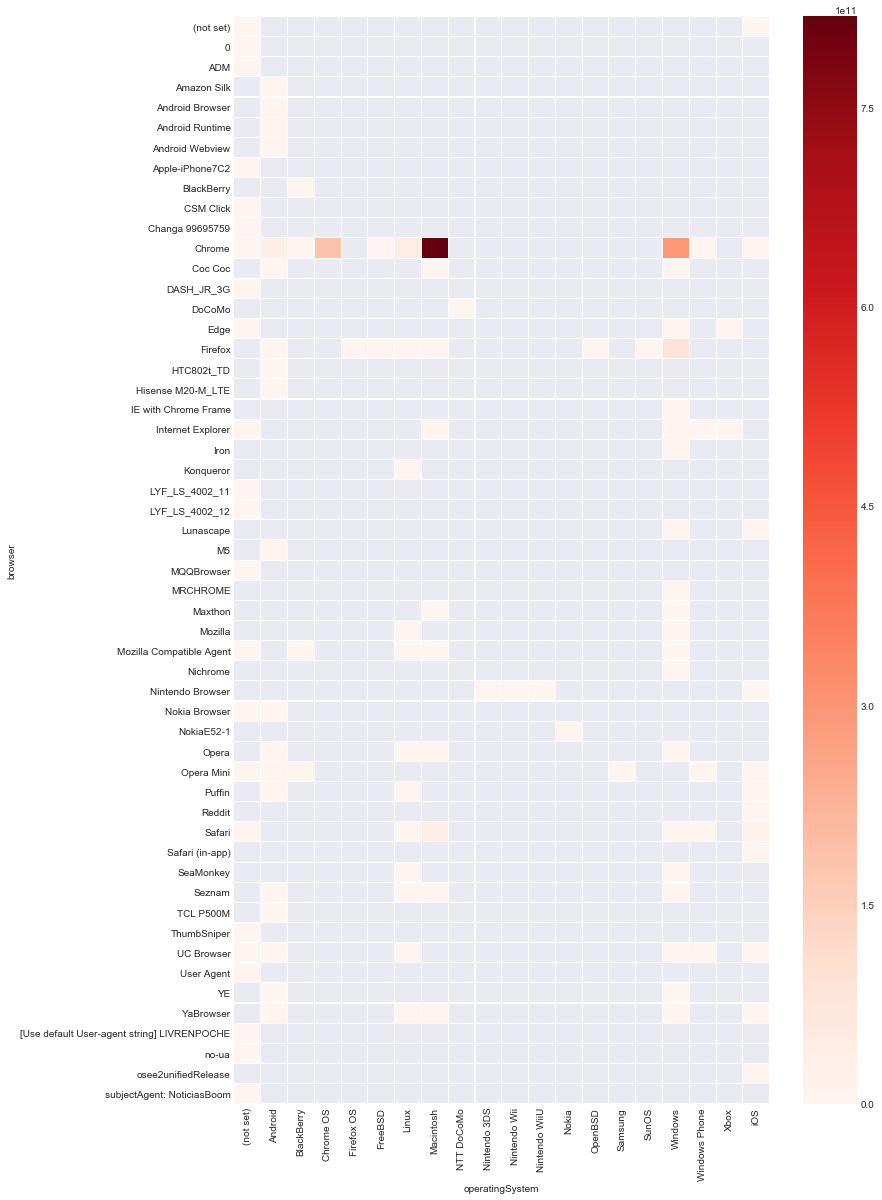

In [143]:
seaborn.set_style("darkgrid")

plotdf = df[['browser', 'operatingSystem', 'transactionRevenue']].copy()
plot_frame = plotdf.groupby(['browser', 'operatingSystem'])['transactionRevenue'].sum()
plot_frame = plot_frame.reset_index()
browsers = plotdf['browser'].unique()
operating_sys = plotdf['operatingSystem'].unique()
matrix = plot_frame.pivot('browser', 'operatingSystem', 'transactionRevenue')
seaborn.heatmap(matrix, 
                cmap='Reds',
            linewidths=.1, 
            xticklabels=matrix.columns,
            yticklabels=matrix.index)
plt.gcf().set_size_inches(12,20)

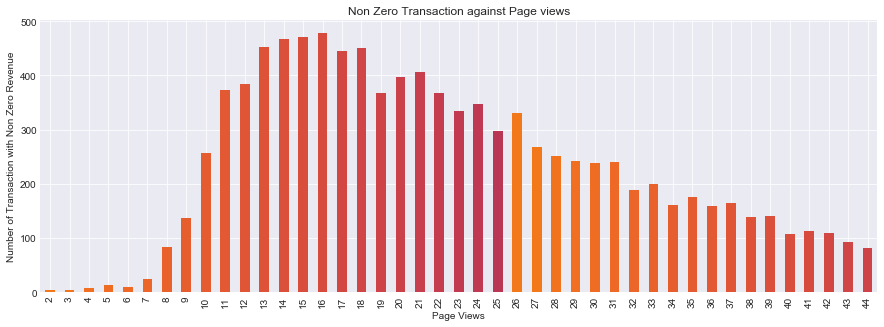

In [144]:

plot2df = df[['pageviews', 'transactionRevenue']].copy()
plot2df.drop(plot2df[plot2df['transactionRevenue'] <= 0.0].index, inplace = True)
plot2df.drop(plot2df[plot2df['pageviews'] >= 45].index, inplace = True)

plot2df = plot2df.groupby('pageviews')['transactionRevenue'].count()

plt = plot2df.plot(kind = 'bar',
                x = 'pageviews',
                y = 'transactionRevenue',
                stacked=True,
                color = cm.inferno_r(np.linspace(.3,.5, 24)), 
                figsize=(15,5),
                title="Non Zero Transaction against Page views" )

plt.set_xlabel("Page Views")
_ = plt.set_ylabel("Number of Transaction with Non Zero Revenue")

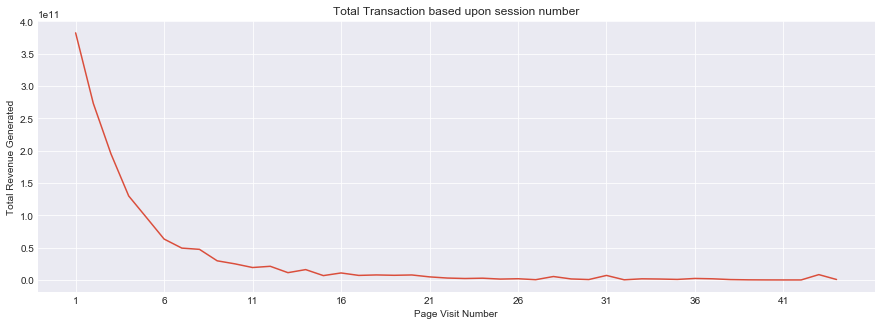

In [145]:
plot3df = df[['visitNumber', 'transactionRevenue']].copy()
plot3df.drop(plot3df[plot3df['visitNumber'] >= 45].index, inplace = True)
plot3df = plot3df.groupby('visitNumber')['transactionRevenue'].sum()
plt = plot3df.plot(kind = 'line',
                x = 'visitNumber',
                y = 'transactionRevenue',
                stacked=True,
                color = cm.inferno_r(np.linspace(.41,.72, 20)), 
                figsize=(15,5), 
                title="Total Transaction based upon session number" )
plt.set_xlabel("Page Visit Number")
_ = plt.set_ylabel("Total Revenue Generated")
_ = plt.set_xticks(range(1,45,5))

<h1>Geo Clustering</h1><hr>

https://stackoverflow.com/questions/12525722/normalize-data-in-pandas
https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

http://geopandas.org/mapping.html


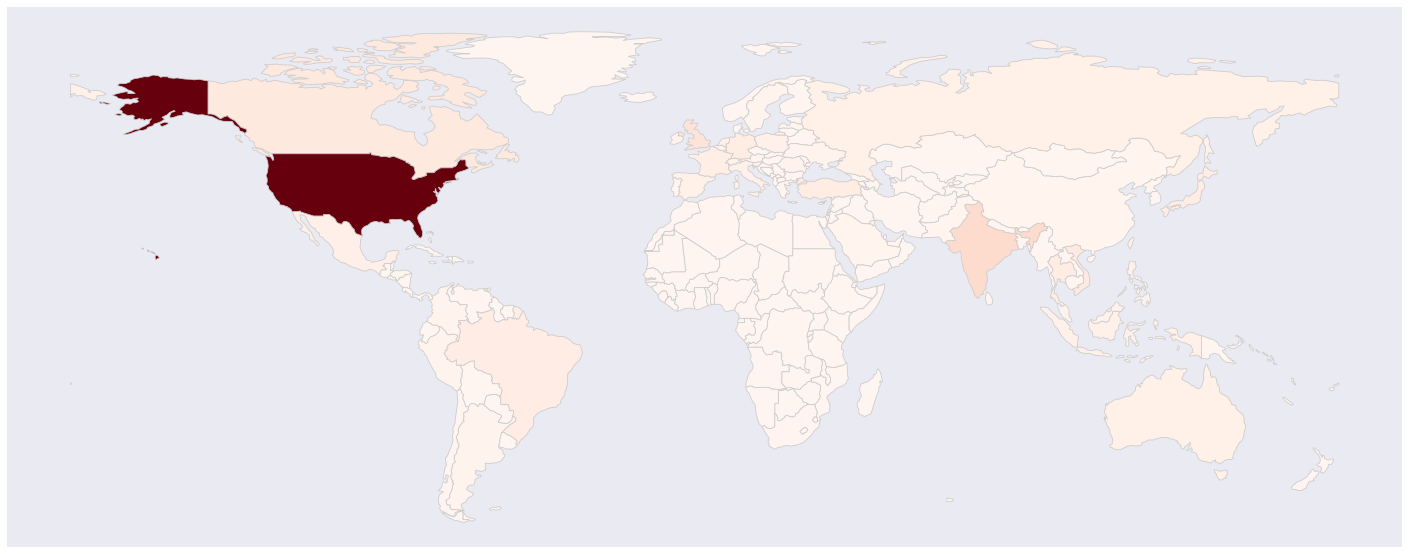

In [253]:
geoplot = df[['continent', 'city', 'metro', 'subContinent', 'country', 'transactionRevenue']].copy()

geoplot = geoplot.groupby('country')['transactionRevenue'].count()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != "Antarctica"]
merged = world.set_index('name').join(geoplot)
merged.transactionRevenue.fillna(0,inplace=True)


geo_fig = merged.plot(column='transactionRevenue', cmap='Reds', 
                      figsize=(25,18),
                      linewidth=0.8, 
                      edgecolor='0.8')

geo_fig.axes.get_xaxis().set_visible(False)
geo_fig.axes.get_yaxis().set_visible(False)



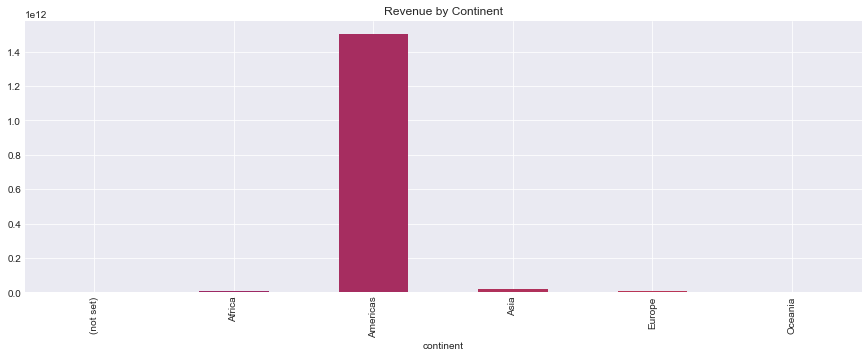

In [262]:
geoplotbar = df[['continent', 'city', 'metro', 'subContinent', 'country', 'transactionRevenue']].copy()
geoplotbar = geoplotbar.groupby('continent')['transactionRevenue'].sum()
geoplotbar = geoplotbar.plot(kind = 'bar',
                x = 'continent',
                y = 'transactionRevenue',
                stacked=True,
                color = cm.inferno_r(np.linspace(.6,.1, 22)), 
                figsize=(15,5),
                title="Total Revenue by Continent" )

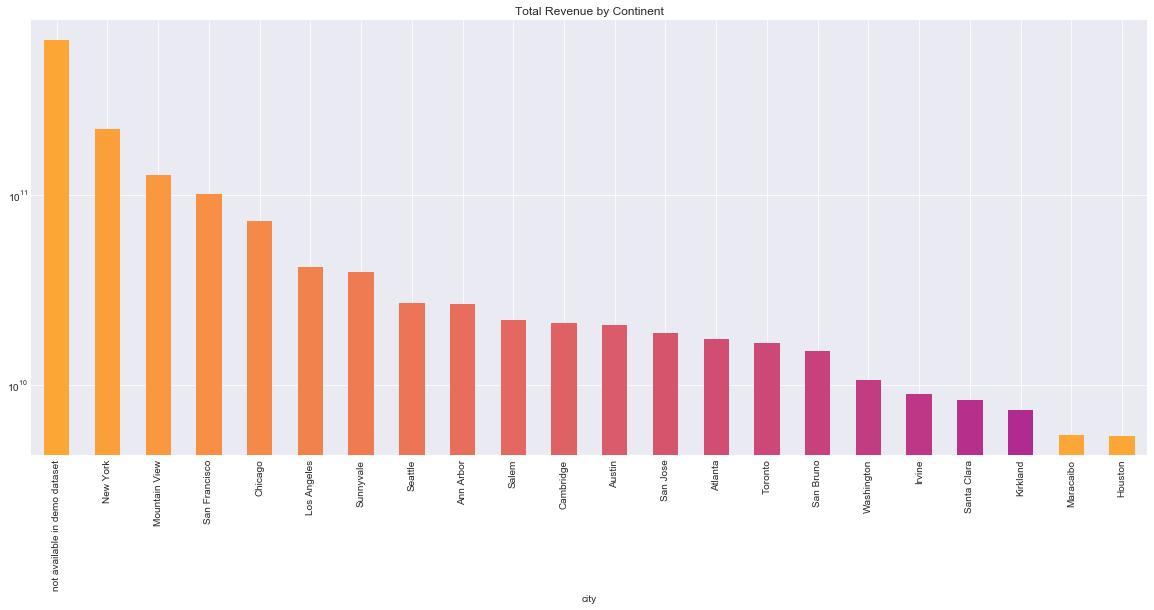

In [444]:
geoplotbar = df[['continent', 'city', 'metro', 'subContinent', 'country', 'transactionRevenue']].copy()
geoplotbar.drop(geoplotbar[geoplotbar['transactionRevenue'] <= 0.0].index, inplace = True)

geoplotbar = geoplotbar.groupby('city')['transactionRevenue'].sum()

geoplotbar = geoplotbar.nlargest(22, keep='first')

geoplotbar = geoplotbar.plot(kind = 'bar',
                x = 'city',
                y = 'transactionRevenue',
                stacked=True,
                color = cm.plasma(np.linspace(.8,.4, 20)), 
                figsize=(20,8),
                logy = True,i
                title="Total Revenue by Continent" )

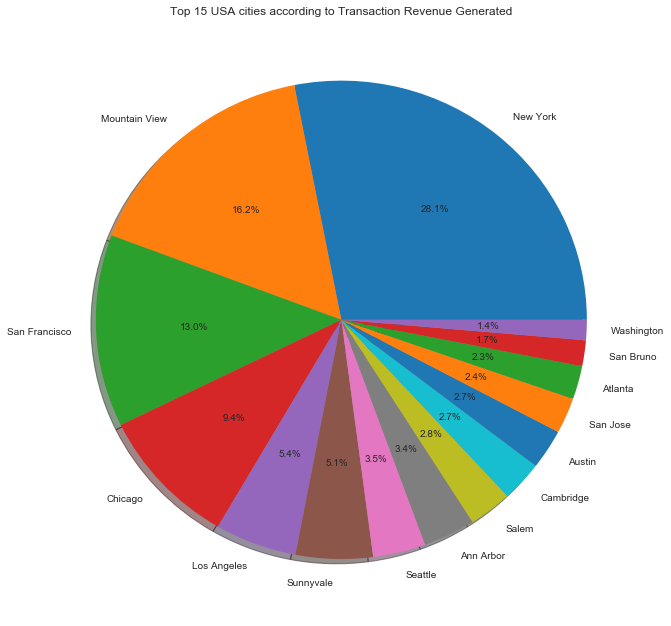

In [424]:
geoplotbar2 = df[[ 'city', 'country', 'transactionRevenue']].copy()
geoplotbar2.drop(geoplotbar2[geoplotbar2['transactionRevenue'] <= 0.0].index, inplace = True)

geoplotbar2.drop(geoplotbar2[geoplotbar2['country'] != "United States"].index, inplace = True)
us_cities_df = geoplotbar2[['city', 'transactionRevenue']].copy()
us_cities_df.drop(us_cities_df[us_cities_df['city'] == "not available in demo dataset"].index, inplace = True)
us_cities_join = us_cities_df.groupby('city')['transactionRevenue'].sum()
us_cities_join = us_cities_join.nlargest(15, keep='first')

us_cities_join
plot = us_cities_join.plot(kind ='pie', 
                    x = 'city', 
                    y = 'transactionRevenue', 
                    title='Top 15 USA cities according to Transaction Revenue Generated', 
                    legend = False, 
                    figsize=(11,11), shadow=True, autopct='%1.1f%%')
plot.set_xlabel('')
_ = plot.set_ylabel('')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 29 columns):
channelGrouping       903653 non-null object
date                  903653 non-null int64
fullVisitorId         903653 non-null object
sessionId             903653 non-null object
visitId               903653 non-null int64
visitNumber           903653 non-null int64
visitStartTime        903653 non-null int64
browser               903653 non-null object
isMobile              903653 non-null bool
deviceCategory        903653 non-null object
operatingSystem       903653 non-null object
city                  903653 non-null object
metro                 903653 non-null object
continent             903653 non-null object
subContinent          903653 non-null object
country               903653 non-null object
networkDomain         903653 non-null object
region                903653 non-null object
visits                903653 non-null object
hits                  903653 non-null ob

<h1> Ranking</h1>

In [32]:
df_rank = df[[ 'operatingSystem',  'pageviews', 'hits', 'visitStartTime', 'visitNumber', 'transactionRevenue', 'browser', 'continent']].copy()


In [33]:
oslist = ['Windows', 'Macintosh', 'Chrome OS', 'Linux', 'Android', 'iOS', 'Windows Phone']
df_rank['operatingSystem'] = df['operatingSystem'].apply(lambda x: x if x in oslist else 'Others')

browserlist = ['Chrome', 'Firefox', 'Safari', 'Internet Explorer', 'Edge', 'Opera', 'Safari (in-app)', 'Android Webview', 'Amazon Silk']
df_rank['browser'] = df['browser'].apply(lambda x: x if x in browserlist else 'Others')

In [34]:
df_rank['transactionRevenue'].fillna(0)
df_rank['hits'].fillna(0)
# df_rank['isTrueDirect'] = df_rank['isTrueDirect']*1
df_rank['isTransaction'] =  np.where(df_rank['transactionRevenue'] > 0, 1, 0)
# df_rank['isTrueDirect'] = df_rank['isTrueDirect'].astype(bool)
df_rank['hits'] = df_rank['hits'].astype(int)

cat_col = ['operatingSystem', 'browser', 'continent']
for col in cat_col:
    df_rank[col] =  df_rank[col].astype('category')
    df_rank[col] = df_rank[col].apply(lambda x: str(x).replace(" ","_"))
    df_rank[col] = df_rank[col].apply(lambda x: str(x).replace("[","_"))
    df_rank[col] = df_rank[col].apply(lambda x: str(x).replace("]","_"))



one_hot_encoded = pandas.get_dummies(data = df_rank, columns = cat_col)

new_rank_df = one_hot_encoded

In [35]:
X = new_rank_df.copy()
X.drop('transactionRevenue', axis = 1, inplace = True)
X.drop('isTransaction', axis = 1, inplace = True)
Y = new_rank_df['isTransaction']
Y1 = new_rank_df['transactionRevenue'].copy()




In [36]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold,StratifiedKFold
from lightgbm.sklearn import LGBMRegressor


sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
iteration = 0
best_score = 0
best_clf = None
for train_index, test_index in sss.split(X, Y):
    
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    
    ratio = 892138/ 11515
    
    clf = XGBClassifier(scale_pos_weight=ratio, reg = 'binary:logistic')
#     clf = LGBMRegressor(boosting_type='gbdt')
    model = clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    
    curr_mse = mean_squared_error(Y_test, predictions)
    curr_score = (clf.score(X_test, Y_test))
    print("Accuracy: "+ str((clf.score(X_test, Y_test)*100).round()) + "%", "\tRMS Error: " + str(mean_squared_error(Y_test, predictions)))

    if iteration == 1:
        best_score = curr_score
        best_clf = clf
    else:
        if curr_score > best_score:
                  best_clf = clf
                  best_score = curr_score
                  
    iteration = iteration + 1

Accuracy: 94.0% 	RMS Error: 0.06314910004371137
Accuracy: 94.0% 	RMS Error: 0.06375220631767654
Accuracy: 94.0% 	RMS Error: 0.0632652948304386
Accuracy: 94.0% 	RMS Error: 0.06367509544624578
Accuracy: 94.0% 	RMS Error: 0.061832567918995184


In [37]:
prediction_prob = clf.predict_proba(X)

In [38]:
# predictions = clf.predict(X_test)

In [39]:
print("Accuracy: "+str((clf.score(X_test, Y_test)*100).round())+"%", 
      "\tRMS Error: " + str(mean_squared_error(Y_test, predictions)))

Accuracy: 94.0% 	RMS Error: 0.061832567918995184


In [40]:
X['TransactionProb'] = pandas.DataFrame(prediction_prob)[1]

In [41]:
X['transactionRevenue'] = Y1

In [42]:
X[['transactionRevenue', 'TransactionProb']].nlargest(10, 'TransactionProb')

,transactionRevenue,TransactionProb
14381,294080000.0,0.989902
37983,31350000.0,0.989902
64046,33310000.0,0.989902
64047,144690000.0,0.989902
80550,0.0,0.989902
131289,33590000.0,0.989902
142405,92090000.0,0.989902
275481,0.0,0.989902
302029,34000000.0,0.989902
326888,15990000.0,0.989902


In [10]:
df.to_pickle('./expaneded2.pkl')

<h1>External Dataset</h1>

In [1129]:
df = pandas.read_pickle('expaneded2.pkl')

In [1132]:
df_pred = df[[ 'operatingSystem',  'pageviews', 'hits', 'visitStartTime', 
              'visitNumber', 'transactionRevenue', 'browser', 'continent', 
              'country', 'deviceCategory', 'medium', 'channelGrouping', 'date', 'city']].copy()

In [1138]:
# test_pred = df_pred.groupby('networkDomain')['transactionRevenue'].sum()

# test_pred.nlargest(100)
# # display(l.keys())

In [1139]:
extdf = pandas.read_csv('Usage.csv')

In [1140]:
extdf.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2011', '2012', '2013', '2014', '2015', '2017'], axis = 1,inplace = True)

In [1141]:
display(extdf.head())

,Country Name,2016
0,Aruba,93.542454
1,Afghanistan,10.595726
2,Angola,13.000000
3,Albania,66.363445
4,Andorra,97.930637


In [1142]:
extdf.rename(index=str, columns={"Country Name": "country", "2016": "internet_usage"}, inplace =True)
extdf.set_index('country')
extdf.head()

,country,internet_usage
0,Aruba,93.542454
1,Afghanistan,10.595726
2,Angola,13.000000
3,Albania,66.363445
4,Andorra,97.930637


In [1143]:
extdf.to_pickle("./internet_usage.pkl")

In [1144]:
feature_df = pandas.merge(df_pred, extdf, how='left', right_on='country', left_on='country')

In [1145]:
test_pred = feature_df.groupby('country')['transactionRevenue'].sum()
country_df = test_pred.nlargest(70)
country_df.to_csv("list.csv")

In [1146]:
country_list = ['United States', 'Canada', 'Venezuela', 'Japan', 'Kenya', 'Nigeria', 
                'Taiwan', 'Indonesia', 'Australia', 'United Kingdom', 'Mexico', 'Hong Kong', 
                'Puerto Rico', 'Belgium', 'Singapore', '(not set)', 'South Korea', 'India', 
                'Ecuador', 'Brazil', 'Israel', 'Colombia', 'Switzerland', 'Germany', 'Malaysia', 
                'Ukraine', 'Thailand', 'France', 'Spain', 'United Arab Emirates', 'Saudi Arabia', 
                'Argentina', 'Netherlands', 'Chile', 'Kuwait', 'Poland', 'Portugal', 'China', 
                'Cura√ßao', 'Italy', 'Greece', 'Ireland', 'Philippines', 'Peru', 'St. Lucia', 
                'Panama', 'Turkey', 'Russia', 'El Salvador', 'Romania', 'Sweden', 'Cyprus', 'South Africa', 
                'Nicaragua', 'Guatemala', 'Finland', 'Pakistan', 'Egypt', 'New Zealand', 
                'Czechia', 'Lebanon', 'Georgia', 'Kazakhstan', 'Hungary', 'Armenia', 'Guadeloupe', 
                'Denmark', 'Anguilla', 'Uruguay', 'Afghanistan']

In [1147]:
feature_df['country'] = feature_df['country'].apply(lambda x: x if x in country_list else 'Others')

In [1148]:
oslist = ['Windows', 'Macintosh', 'Chrome OS', 'Linux', 'Android', 'iOS', 'Windows Phone']
feature_df['operatingSystem'] = feature_df['operatingSystem'].apply(lambda x: x if x in oslist else 'Others')

browserlist = ['Chrome', 'Firefox', 'Safari', 'Internet Explorer', 'Edge', 'Opera', 'Safari (in -app)', 'Android Webview', 'Amazon Silk']
feature_df['browser'] = feature_df['browser'].apply(lambda x: x if x in browserlist else 'Others')

In [1150]:
# sourcelist = ['mall.googleplex.com', '(direct)', 'google', 'dfa', 'mail.google.com',
#        'dealspotr.com', 'sites.google.com', 'gdeals.googleplex.com',
#        'groups.google.com', 'yahoo', 'facebook.com', 'l.facebook.com', 'bing',
#        'Partners', 'connect.googleforwork.com', 'mg.mail.yahoo.com',
#        'siliconvalley.about.com', 'google.com', 'youtube.com', 'phandroid.com',
#        't.co', 'plus.google.com', 'googleux.perksplus.com', 'm.facebook.com',
#        'basecamp.com', 'search.myway.com', 'pinterest.com', 'duckduckgo.com',
#        'gatewaycdi.com', 'chat.google.com', 'keep.google.com', 'mail.aol.com',
#        'search.xfinity.com', 'seroundtable.com', 'calendar.google.com',
#        'moma.corp.google.com', 'trainup.withgoogle.com', 'docs.google.com',
#        'ask', 'outlook.live.com', 'quora.com', 'us-mg5.mail.yahoo.com',
#        'l.messenger.com', 'reddit.com']
# feature_df['source'] = feature_df['source'].apply(lambda x: x if x in sourcelist else 'Others')

In [1151]:
feature_df.describe()

,pageviews,visitStartTime,visitNumber,transactionRevenue,date,internet_usage
count,903653.000000,9.036530e+05,903653.000000,9.036530e+05,9.036530e+05,852705.000000
mean,3.849338,1.485007e+09,2.264897,1.704273e+06,2.016589e+07,70.791033
std,7.025002,9.022124e+06,9.283735,5.277866e+07,4.697698e+03,18.080284
min,0.000000,1.470035e+09,1.000000,0.000000e+00,2.016080e+07,1.177119
25%,1.000000,1.477561e+09,1.000000,0.000000e+00,2.016103e+07,60.872540
50%,1.000000,1.483949e+09,1.000000,0.000000e+00,2.017011e+07,76.176737
75%,4.000000,1.492759e+09,1.000000,0.000000e+00,2.017042e+07,78.788310
max,469.000000,1.501657e+09,395.000000,2.312950e+10,2.017080e+07,98.240016


In [1152]:
feature_df.to_pickle('feature_df.pkl')

<h1>Final Prediction</h1>

In [1160]:
feature_df = pandas.read_pickle('feature_df.pkl')


In [1161]:
list(feature_df)


['operatingSystem',
 'pageviews',
 'hits',
 'visitStartTime',
 'visitNumber',
 'transactionRevenue',
 'browser',
 'continent',
 'country',
 'deviceCategory',
 'medium',
 'channelGrouping',
 'date',
 'city',
 'networkDomain',
 'internet_usage']

In [1162]:
feature_df['transactionRevenue'].fillna(0)
feature_df['country'].fillna('_')
feature_df['hits'].fillna(0)
feature_df['hits'] = feature_df['hits'].astype(int)
feature_df['city'].fillna('_')
# df_rank['isTrueDirect'] = df_rank['isTrueDirect']*1
# # df_rank['isTrueDirect'] = df_rank['isTrueDirect'].astype(bool)

feature_cat_col = ['deviceCategory', 'continent', 'medium', 
                   'channelGrouping', 'browser', 
                   'operatingSystem', 'country', 'city']
for col in feature_cat_col:
    feature_df[col] =  feature_df[col].astype('category')
    feature_df[col] = feature_df[col].apply(lambda x: str(x).replace(" ","_"))
    feature_df[col] = feature_df[col].apply(lambda x: str(x).replace("[","_"))
    feature_df[col] = feature_df[col].apply(lambda x: str(x).replace("]","_"))


one_hot_encoded_feature = pandas.get_dummies(data = feature_df, columns = feature_cat_col)

new_feature_df = one_hot_encoded_feature

In [1163]:
new_feature_df.describe()

,pageviews,hits,visitStartTime,visitNumber,transactionRevenue,date,internet_usage,deviceCategory_desktop,deviceCategory_mobile,deviceCategory_tablet,...,city_Zamudio,city_Zaoqiao_Township,city_Zapopan,city_Zaragoza,city_Zaventem,city_Zhongli_District,city_Zhudong_Township,city_Zurich,city_Zwolle,city_not_available_in_demo_dataset
count,903653.000000,903653.000000,9.036530e+05,903653.000000,9.036530e+05,9.036530e+05,852705.000000,903653.000000,903653.000000,903653.000000,...,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,3.849338,4.596538,1.485007e+09,2.264897,1.704273e+06,2.016589e+07,70.791033,0.735325,0.230979,0.033695,...,0.000015,0.000008,0.000007,0.000048,0.000010,0.000266,0.000019,0.001312,0.000007,0.562416
std,7.025002,9.641437,9.022124e+06,9.283735,5.277866e+07,4.697698e+03,18.080284,0.441160,0.421459,0.180444,...,0.003936,0.002783,0.002577,0.006898,0.003156,0.016295,0.004337,0.036204,0.002577,0.496089
min,0.000000,1.000000,1.470035e+09,1.000000,0.000000e+00,2.016080e+07,1.177119,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.477561e+09,1.000000,0.000000e+00,2.016103e+07,60.872540,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.483949e+09,1.000000,0.000000e+00,2.017011e+07,76.176737,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,4.000000,1.492759e+09,1.000000,0.000000e+00,2.017042e+07,78.788310,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,469.000000,500.000000,1.501657e+09,395.000000,2.312950e+10,2.017080e+07,98.240016,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1164]:
print(list(new_feature_df))

['pageviews', 'hits', 'visitStartTime', 'visitNumber', 'transactionRevenue', 'date', 'networkDomain', 'internet_usage', 'deviceCategory_desktop', 'deviceCategory_mobile', 'deviceCategory_tablet', 'continent_(not_set)', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe', 'continent_Oceania', 'medium_(none)', 'medium_(not_set)', 'medium_affiliate', 'medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral', 'channelGrouping_(Other)', 'channelGrouping_Affiliates', 'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic_Search', 'channelGrouping_Paid_Search', 'channelGrouping_Referral', 'channelGrouping_Social', 'browser_Amazon_Silk', 'browser_Android_Webview', 'browser_Chrome', 'browser_Edge', 'browser_Firefox', 'browser_Internet_Explorer', 'browser_Opera', 'browser_Others', 'browser_Safari', 'operatingSystem_Android', 'operatingSystem_Chrome_OS', 'operatingSystem_Linux', 'operatingSystem_Macintosh', 'operatingSystem_Others', 'operati

In [1168]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X_feat = new_feature_df.copy()
X_feat.drop('networkDomain', axis = 1, inplace = True)

# X_feat.drop('deviceCategory', axis = 1, inplace = True)
# X_feat.drop('city', axis = 1, inplace = True)
# X_feat.drop('country', axis = 1, inplace = True)

# X_feat.drop('browser', axis = 1, inplace = True)
# X_feat.drop('operatingSystem', axis = 1, inplace = True)


# X_feat.drop('internet_usage', axis = 1, inplace = True)

Y_feat = X_feat['transactionRevenue'].apply(lambda x: np.log1p(x))
Y1_feat =  np.where(X_feat['transactionRevenue'] > 0, 1, 0)
X_feat.drop('transactionRevenue', axis = 1, inplace = True)

Y_feat.describe()

count    903653.000000
mean          0.227118
std           2.003710
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.864375
Name: transactionRevenue, dtype: float64

In [1169]:
X_feat_to_remove_list = ['city_Appleton', 'city_Mueang_Nakhon_Ratchasima_District', 'city_Fort_Collins', 'city_Mueang_Khon_Kaen_District', 'city_Ribeirao_Preto', 'city_Weingarten', 'city_Hue', 'city_Cardiff', 'city_Hai_Duong', 'city_Gijon', 'city_Tigard', 'city_Decin', "city_Saint-Ouen-l'Aumone", 'city_Chisinau', 'city_Schagen', 'city_Greve_Strand', 'city_Kovrov', 'city_Wheaton', 'city_Almaty', 'city_Shiocton', 'city_Dalat', 'city_Frederiksberg', 'city_Oegstgeest', 'city_Mankato', 'city_Druid_Hills', 'city_Alba', 'city_South_El_Monte', 'city_Hradec_Kralove', 'city_Netanya', 'city_Kharkiv', 'city_Mueang_Chiang_Mai_District', 'city_Wheeling', 'city_Hua_Hin', 'city_Parsippany-Troy_Hills', 'city_Szczecin', 'city_Phan_Thiet', 'city_Saint_Polten', 'city_Syracuse', 'city_Lewisville', 'city_Laguna_Beach', 'city_Kiryat_Ono', 'city_Ludhiana', 'city_Bothell', 'city_Atwater', 'city_Brest', 'city_Rockwood', 'city_Zaventem', 'city_Zaoqiao_Township', "city_'s_Hertogenbosch", 'city_Hayward', 'city_Fareham', 'city_Alba_Iulia', 'city_Paradise', 'city_Dnipro', 'city_Nam_Djinh', 'city_Doha', 'city_Pontivy', 'city_Vladivostok', 'city_Greystones', 'city_Smyrna', 'city_Pescara', 'city_Fukui', 'city_Vladimir', 'city_Charlottesville', 'city_Ballinger', 'city_Depok', 'city_Egham', 'city_Dhaka', 'city_Quimper', 'city_Santiago_de_Queretaro', 'city_Luxembourg_City', 'city_North_Attleborough', 'city_Evans', 'city_Gatineau', 'city_Allendale_Charter_Township', 'city_Collegeville', 'city_Chamblee', 'city_Redondo_Beach', 'city_Sandy_Springs', 'city_Maracaibo', 'city_Spaichingen', 'city_Altrincham', 'city_Johnson_City', 'city_North_Richland_Hills', 'city_Sibiu', 'city_Evanston', 'city_Pleiku', 'city_Westville', 'city_Barnsley', 'city_Buon_Ma_Thuot', 'city_Piura', 'city_The_Dalles', 'city_Hoi_An', 'city_Konya', 'city_Amã', 'city_Leuven', 'city_Avon', 'city_Aalen', 'city_Tirana', 'city_Danville', 'city_Towson', 'city_Kharagpur', 'city_Johor_Bahru', 'city_Nakhon_Pathom', 'city_Sakai', 'city_Odessa', 'city_Ha_Tinh', 'city_Faisalabad', 'city_Tempe', 'city_Clermont-Ferrand', 'city_Parma', 'city_Kosice', 'city_Beirut', 'city_Zwolle', 'country_Anguilla', 'city_Ipoh', 'city_Daegu', 'city_Amersfoort', 'city_Nea_Erythraia', 'city_Thai_Binh', 'city_Zamudio', 'city_Ulaanbaatar', 'city_Oradea', 'city_Forest_Park', 'city_Ningbo', 'city_Vejle', 'city_Oneonta', 'city_Bath', 'city_Talence', 'city_Qui_Nhon', 'city_Erzurum', 'city_Trabzon', 'city_Lausanne', 'city_Eskisehir', 'city_Mueang_Songkhla_District', 'city_Shah_Alam', 'city_Florianopolis', 'city_Brookline', 'city_Daly_City', 'city_Aydin', 'city_Culpeper', 'city_Hamden', 'city_Olomouc', 'city_Samsun', 'city_Medina', 'city_Targu_Mures', 'city_Atibaia', 'city_New_Westminster', 'city_Subang_Jaya', 'city_Columbia', 'city_Furth', 'city_Issy-les-Moulineaux', 'city_Kayseri', 'city_Birkenes', 'city_Ciudad_Real', 'city_Boardman', 'city_Thai_Nguyen', 'city_Kuwait_City', 'city_Carrollton', 'city_Elche', 'city_Boise', 'city_Woodbridge_Township', 'city_Cao_Lanh', 'city_Hangzhou', 'city_Toledo', 'city_Hermosillo', 'city_Kampar', 'city_Sandy', 'city_White_Plains', 'city_Vinh', 'city_Watford', 'city_Wrexham', 'city_Kiev', 'city_Mueang_Phitsanulok_District', 'city_Cabimas', 'city_Seclin', 'city_Mersin', 'city_Westlake_Village', 'city_Tampere', 'city_Deep_River', 'city_Nanded', 'city_Cagliari', 'city_Baku', 'city_Miami_Beach', 'city_Semarang', 'city_Can_Tho', 'city_Walnut_Creek', 'city_Rach_Gia', 'city_Marlboro', 'city_Toufen_City', 'city_Hukou_Township', 'city_Union_City', 'city_Quang_Ngai', 'city_Chino', 'city_Kumamoto', 'city_Randburg', 'city_Valparaiso', 'city_Belagavi', 'city_Okemos', 'city_Pasig', 'city_Byron', 'city_Koszalin', 'city_Groningen', 'city_LaFayette', 'city_Amherst', 'city_Molesey', 'city_My_Tho', 'city_Wollongong', "city_St._John's", 'city_La_Chorrera', 'city_Bekasi', 'city_Bellflower', 'city_Roskilde', 'city_Oslo', 'city_Pessac', 'city_Longtan_District', 'city_Tallahassee', 'city_Charlottetown', 'city_Pueblo', 'city_Muntinlupa', 'city_Aberdeen', 'city_Burlington', 'city_Sabadell', 'city_Deva', 'city_Thanh_Hoa']
X_feat.drop(columns = X_feat_to_remove_list, axis=1, inplace = True)

In [1214]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold,StratifiedKFold
from lightgbm.sklearn import LGBMRegressor
import lightgbm
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from sklearn.decomposition import PCA

sss = StratifiedKFold(n_splits=10, shuffle=False, random_state=15)

iteration = 0
best_score_final = 0
best_mse = 0
best_clf_final = None
avg_rmse = 0.0
for train_index, test_index in sss.split(X_feat, Y1_feat):
    
    X_feat_train, X_feat_test = X_feat.iloc[train_index,:], X_feat.iloc[test_index,:]
    Y_feat_train, Y_feat_test = Y_feat.iloc[train_index], Y_feat.iloc[test_index]
    
    
    ratio = 892138/11515
   
    clf_final = LGBMRegressor(scale_pos_weight = ratio, 
                              learning_rate = 0.121, subsample_freq = 1)

    model_final = clf_final.fit(X_feat_train, Y_feat_train)
    predictions_final = clf_final.predict(X_feat_test)

    curr_mse_final = mean_squared_error(Y_feat_test, predictions_final)
    curr_score_final = (clf_final.score(X_feat_test, Y_feat_test))
    print("Accuracy: "+ str((clf_final.score(X_feat_test, Y_feat_test)*100).round()) + "%", "\tRMS Error: " + 
          str(mean_squared_error(Y_feat_test, predictions_final)))
    avg_rmse = avg_rmse + mean_squared_error(Y_feat_test, predictions_final)**0.5
    if iteration == 1:
        best_mse = curr_mse_final
        best_clf_final = clf_final
    else:
        if best_mse > curr_mse_final:
                  best_clf_final = clf_final
                  best_mse = curr_mse_final
                  
    iteration = iteration + 1
    
print("Avg RMSE: ", avg_rmse/iteration)

Accuracy: 33.0% 	RMS Error: 2.69163040731603
Accuracy: 37.0% 	RMS Error: 2.5310827675013274
Accuracy: 33.0% 	RMS Error: 2.6695544484498694
Accuracy: 35.0% 	RMS Error: 2.6091107338493904
Accuracy: 34.0% 	RMS Error: 2.6616422951411707
Accuracy: 32.0% 	RMS Error: 2.73537305674302
Accuracy: 36.0% 	RMS Error: 2.5891051215977687
Accuracy: 34.0% 	RMS Error: 2.6329254332219727
Accuracy: 34.0% 	RMS Error: 2.6306486397110596
Accuracy: 33.0% 	RMS Error: 2.6566908409964856
Avg RMSE:  1.624962040214438


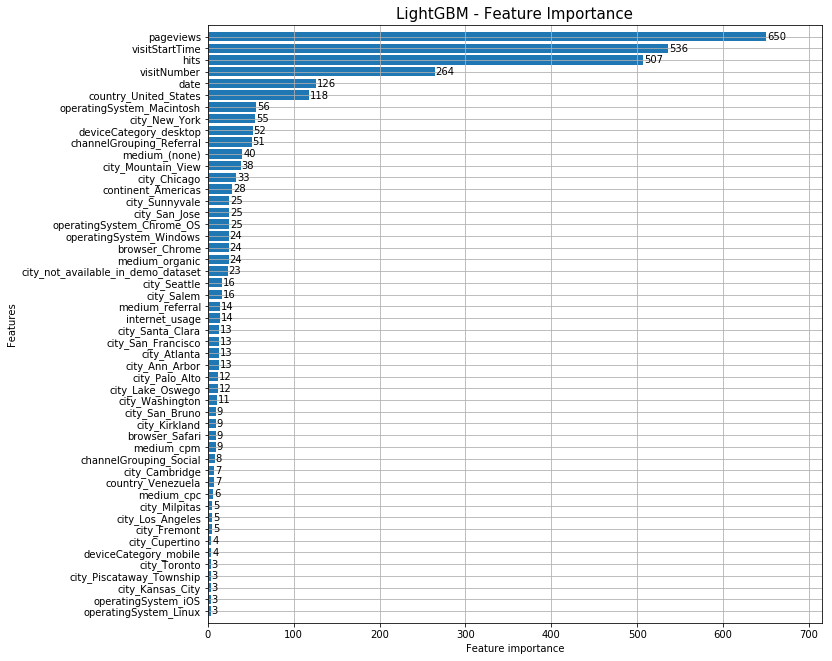

In [1215]:
lightgbm.plot_importance(best_clf_final, max_num_features=50, height=0.8, figsize=(11,11))
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

<h1>Preparing Submission</h1>

In [1172]:
test_df = pandas.read_csv('all/test.csv', low_memory=False)

In [1173]:
new_device_test_df = pandas.DataFrame.from_records(test_df['device'].apply(json.loads).values.tolist())
new_device_test_df = new_device_test_df[['browser', 'isMobile', 'deviceCategory', 'operatingSystem']]
display(new_device_test_df.describe())

,browser,isMobile,deviceCategory,operatingSystem
count,804684,804684,804684,804684
unique,109,2,3,22
top,Chrome,False,desktop,Windows
freq,552692,507140,507100,269648


In [1174]:
new_geoNetwork_test_df = pandas.DataFrame.from_records(test_df['geoNetwork'].apply(json.loads).values.tolist())
new_geoNetwork_test_df = new_geoNetwork_test_df[['city', 'metro' ,'continent', 'subContinent', 'country', 'networkDomain', 'region']]
display(new_geoNetwork_test_df.describe())

,city,metro,continent,subContinent,country,networkDomain,region
count,804684,804684,804684,804684,804684,804684,804684
unique,732,109,6,23,219,25750,376
top,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,(not set),not available in demo dataset
freq,424730,424730,427026,377688,352473,254168,424730


In [1175]:
new_totals_test_df = pandas.DataFrame.from_records(test_df['totals'].apply(json.loads).values.tolist())
new_totals_test_df = new_totals_test_df[['visits', 'hits' ,'pageviews', 'bounces', 'newVisits']]
display(new_totals_test_df.describe())

,visits,hits,pageviews,bounces,newVisits
count,804684,804684,804545,420948,604370
unique,1,229,160,1,1
top,1,1,1,1,1
freq,804684,417310,423806,420948,604370


In [1176]:
new_trafficSource_test_df = pandas.DataFrame.from_records(test_df['trafficSource'].apply(json.loads).values.tolist())
new_trafficSource_test_df = new_trafficSource_test_df[['source' ,'medium', 'keyword', 'referralPath', 'isTrueDirect']]
display(new_trafficSource_test_df.describe())

,source,medium,keyword,referralPath,isTrueDirect
count,804684,804684,413652,235323,260513
unique,324,7,2415,2197,1
top,google,organic,(not provided),/,True
freq,417104,357402,346391,62770,260513


In [1177]:
test_df = test_df.drop(['device', 'trafficSource', 'totals', 'geoNetwork'], axis = 1)
expanded_test_df = pandas.concat([test_df, new_device_test_df, new_geoNetwork_test_df, new_totals_test_df, 
                             new_trafficSource_test_df], axis = 1)

In [1178]:
expanded_test_df.to_pickle('test_data_proc.pkl')

In [1179]:
test_df = pandas.read_pickle('test_data_proc.pkl')

In [1180]:
test_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,isMobile,...,visits,hits,pageviews,bounces,newVisits,source,medium,keyword,referralPath,isTrueDirect
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,False,...,1,4,4,NaN,NaN,google,organic,(not provided),NaN,True
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,False,...,1,5,5,NaN,1,google,organic,(not provided),NaN,NaN
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,False,...,1,7,7,NaN,1,google,organic,(not provided),NaN,NaN
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,True,...,1,8,4,NaN,1,google,organic,(not provided),NaN,NaN
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,False,...,1,9,4,NaN,1,google,organic,(not provided),NaN,NaN


In [1181]:
test_df.pageviews.fillna(0,inplace=True)
test_df.bounces.fillna(0,inplace=True)
test_df.visitId.fillna(0,inplace=True)
test_df.pageviews.fillna(0,inplace=True)
test_df.isTrueDirect.fillna(0,inplace=True)
test_df.operatingSystem.fillna('Others',inplace=True)
test_df.pageviews.astype('int64', inplace = True)

test_df.isTrueDirect.replace({'true':1}, inplace=True)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 29 columns):
channelGrouping         804684 non-null object
date                    804684 non-null int64
fullVisitorId           804684 non-null object
sessionId               804684 non-null object
socialEngagementType    804684 non-null object
visitId                 804684 non-null int64
visitNumber             804684 non-null int64
visitStartTime          804684 non-null int64
browser                 804684 non-null object
isMobile                804684 non-null bool
deviceCategory          804684 non-null object
operatingSystem         804684 non-null object
city                    804684 non-null object
metro                   804684 non-null object
continent               804684 non-null object
subContinent            804684 non-null object
country                 804684 non-null object
networkDomain           804684 non-null object
region                  804684 non-null object
vi

In [1182]:
oslist = ['Windows', 'Macintosh', 'Chrome OS', 'Linux', 'Android', 'iOS', 'Windows Phone']
test_df['operatingSystem'] = test_df['operatingSystem'].apply(lambda x: x if x in oslist else 'Others')

browserlist = ['Chrome', 'Firefox', 'Safari', 'Internet Explorer', 'Edge', 'Opera', 'Safari (in -app)', 'Android Webview', 'Amazon Silk']
test_df['browser'] = test_df['browser'].apply(lambda x: x if x in browserlist else 'Others')

country_list = ['United States', 'Canada', 'Venezuela', 'Japan', 'Kenya', 'Nigeria', 
                'Taiwan', 'Indonesia', 'Australia', 'United Kingdom', 'Mexico', 'Hong Kong', 
                'Puerto Rico', 'Belgium', 'Singapore', '(not set)', 'South Korea', 'India', 
                'Ecuador', 'Brazil', 'Israel', 'Colombia', 'Switzerland', 'Germany', 'Malaysia', 
                'Ukraine', 'Thailand', 'France', 'Spain', 'United Arab Emirates', 'Saudi Arabia', 
                'Argentina', 'Netherlands', 'Chile', 'Kuwait', 'Poland', 'Portugal', 'China', 
                'Cura√ßao', 'Italy', 'Greece', 'Ireland', 'Philippines', 'Peru', 'St. Lucia', 
                'Panama', 'Turkey', 'Russia', 'El Salvador', 'Romania', 'Sweden', 'Cyprus', 'South Africa', 
                'Nicaragua', 'Guatemala', 'Finland', 'Pakistan', 'Egypt', 'New Zealand', 
                'Czechia', 'Lebanon', 'Georgia', 'Kazakhstan', 'Hungary', 'Armenia', 'Guadeloupe', 
                'Denmark', 'Anguilla', 'Uruguay', 'Afghanistan']

test_df['country'] = test_df['country'].apply(lambda x: x if x in country_list else 'Others')

# sourcelist = ['mall.googleplex.com', '(direct)', 'google', 'dfa', 'mail.google.com',
#        'dealspotr.com', 'sites.google.com', 'gdeals.googleplex.com',
#        'groups.google.com', 'yahoo', 'facebook.com', 'l.facebook.com', 'bing',
#        'Partners', 'connect.googleforwork.com', 'mg.mail.yahoo.com',
#        'siliconvalley.about.com', 'google.com', 'youtube.com', 'phandroid.com',
#        't.co', 'plus.google.com', 'googleux.perksplus.com', 'm.facebook.com',
#        'basecamp.com', 'search.myway.com', 'pinterest.com', 'duckduckgo.com',
#        'gatewaycdi.com', 'chat.google.com', 'keep.google.com', 'mail.aol.com',
#        'search.xfinity.com', 'seroundtable.com', 'calendar.google.com',
#        'moma.corp.google.com', 'trainup.withgoogle.com', 'docs.google.com',
#        'ask', 'outlook.live.com', 'quora.com', 'us-mg5.mail.yahoo.com',
#        'l.messenger.com', 'reddit.com']
# test_df['source'] = test_df['source'].apply(lambda x: x if x in sourcelist else 'Others')

In [1183]:
test_df.to_pickle('test_data_proc.pkl')

In [1184]:
df_pred_test = pandas.read_pickle('test_data_proc.pkl')
df_pred_test = df_pred_test[[ 'operatingSystem',  'pageviews', 'hits', 'visitStartTime', 
              'visitNumber', 'browser', 'continent',
              'country', 'deviceCategory', 'medium', 'channelGrouping', 'date', 'city']].copy()

In [1185]:
feature_test_df = df_pred_test.copy()

In [1186]:
extdf_test = pandas.read_pickle('internet_usage.pkl')

In [1187]:
feature_test_df = pandas.merge(df_pred_test, extdf_test, how='left', right_on='country', left_on='country')

In [1188]:
feature_test_df['hits'].fillna(0)
feature_test_df['hits'] = feature_test_df['hits'].astype(int)
feature_test_df['city'].fillna('_')
# df_rank['isTrueDirect'] = df_rank['isTrueDirect']*1
# # df_rank['isTrueDirect'] = df_rank['isTrueDirect'].astype(bool)

feature_cat_test_col = ['deviceCategory', 'continent', 'medium', 
                   'channelGrouping', 'browser', 
                   'operatingSystem', 'country', 'city']
for col in feature_cat_test_col:
    feature_test_df[col] =  feature_test_df[col].astype('category')
    feature_test_df[col] = feature_test_df[col].apply(lambda x: str(x).replace(" ","_"))
    feature_test_df[col] = feature_test_df[col].apply(lambda x: str(x).replace("[","_"))
    feature_test_df[col] = feature_test_df[col].apply(lambda x: str(x).replace("]","_"))


one_hot_encoded_feature_test = pandas.get_dummies(data = feature_test_df, columns = feature_cat_test_col)

new_feature_test_df = one_hot_encoded_feature_test

In [1189]:
X_feat_test = new_feature_test_df.copy()
# X_feat_test.drop(columns = ['country'], axis = 1, inplace = True)
list1 = list(set(X_feat_test) - set(X_feat))
list2 = list(set(X_feat) - set(X_feat_test))
print(list2)
X_feat_test.drop(columns = list1, axis=1, inplace = True)
X_feat_test = pandas.concat([X_feat_test,pandas.DataFrame(columns=list2)], sort=False)
print(len(list(X_feat)), len(list(X_feat_test)))
X_feat_test.fillna(0, inplace = True)

[]
541 541


In [1190]:
X_feat_test['pageviews'].fillna(0, inplace = True)
X_feat_test['pageviews'] = X_feat_test['pageviews'].astype('int64')

X_feat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804684 entries, 0 to 804683
Columns: 541 entries, pageviews to city_not_available_in_demo_dataset
dtypes: float64(1), int64(5), uint8(535)
memory usage: 453.5 MB


In [1191]:
test_pred = best_clf_final.predict(X_feat_test)

In [1192]:
submission_df = pandas.DataFrame()
submission_df['fullVisitorId'] = test_df['fullVisitorId']
submission_df['Predictions'] = pandas.Series(test_pred)


In [1193]:
submission_df.describe()

,Predictions
count,804684.000000
mean,0.174542
std,0.973313
min,-2.492101
25%,-0.000508
50%,0.001124
75%,0.004143
max,17.028829


In [1194]:
submission_df['Predictions'] = submission_df['Predictions'].apply(np.expm1)
display(submission_df.head())

,fullVisitorId,Predictions
0,6167871330617112363,0.001155
1,0643697640977915618,-0.000507
2,6059383810968229466,-0.000114
3,2376720078563423631,0.002038
4,2314544520795440038,0.002772


In [1195]:
final_csv = submission_df.groupby('fullVisitorId').sum().reset_index()
final_csv.isnull().any().any()

False

In [1196]:
final_csv.describe()
final_csv.isnull().any().any()

False

In [1197]:
len(final_csv)

617242

In [1198]:
final_csv['Predictions'] = final_csv['Predictions'].apply(np.log1p)
final_csv.fillna(0, inplace = True)
final_csv.rename(index=str, columns={"Predictions": "PredictedLogRevenue"}, inplace = True)
final_csv.describe()
final_csv.isnull().any().any()


False

In [1199]:
final_csv.to_csv('submission.csv',index = False)

In [1200]:
final_csv.isnull().any().any()

False

<h1>Permutation Test</h1>

In [1223]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedShuffleSplit


In [1233]:
# X_train, X_test, y_train, y_test = train_test_split(X_feat, Y_feat, test_size=0.2, random_state=42, stratify=Y1_feat)

In [1234]:
cv = train_test_split(X_feat, Y_feat, test_size=0.2, random_state=42, stratify=Y1_feat)
clf = LGBMRegressor(scale_pos_weight = ratio, learning_rate = 0.121, subsample_freq = 1)

In [1247]:
score, permutation_scores, pvalue = permutation_test_score(clf, X_feat, Y_feat, 
                                                           groups = X_feat['pageviews'],
                                                           n_permutations = 10)

print("score %s (pvalue : %s)" % (score, pvalue))
print(permutation_scores)

score 0.3426711187036924 (pvalue : 0.09090909090909091)
[0.1864755  0.18636136 0.18652609 0.18903014 0.18780382 0.18476094
 0.1860491  0.18706084 0.18577942 0.18653304]


In [1250]:
score_1, permutation_scores_1, pvalue_1 = permutation_test_score(clf, X_feat, Y_feat, 
                                                           groups = X_feat['internet_usage'],
                                                           n_permutations = 8)

print("score %s (pvalue : %s)" % (score_1, pvalue_1))
print(permutation_scores_1)

score 0.3426711187036924 (pvalue : 0.1111111111111111)
[0.01737187 0.01773557 0.01763847 0.01774917 0.0178161  0.01781537
 0.01803935 0.01748619]
